## Importación modulos y dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv("../data/conchillas_listo.csv", sep=",", low_memory=False)

In [4]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,...,Adulto_AT,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,5,6.18,1.83,13.57,10.00,8.10,6.04,5.15,LU,...,True,0.296117,0.736920,0.745679,0.183000,0.455416,0.604000,0.596905,0.302980,0.762963
1,96,5,6.16,1.83,13.66,10.08,8.16,6.13,5.12,LU,...,True,0.297078,0.737921,0.751225,0.181548,0.450952,0.608135,0.597365,0.298532,0.754902
2,96,5,6.14,1.81,13.61,10.01,8.20,6.14,5.10,LU,...,True,0.294788,0.735489,0.748780,0.180819,0.451139,0.613387,0.602498,0.294788,0.748780
3,96,5,6.18,1.82,13.85,10.07,8.16,6.14,5.09,LU,...,True,0.294498,0.727076,0.752451,0.180735,0.446209,0.609732,0.589170,0.296417,0.757353
4,96,6,6.58,2.16,11.69,9.10,6.56,4.92,5.49,LU,...,True,0.328267,0.778443,0.750000,0.237363,0.562874,0.540659,0.561163,0.439024,1.003049


In [5]:
data.dtypes

Lote             int64
Individuo        int64
AE             float64
LE             float64
AT             float64
LT             float64
AA             float64
LA             float64
NV             float64
Morfotipo       object
Labio            int64
Filtro_NV         bool
Adulto_AT         bool
Ratio_LE_AE    float64
Ratio_LT_AT    float64
Ratio_LA_AA    float64
Ratio_LE_LT    float64
Ratio_AE_AT    float64
Ratio_LA_LT    float64
Ratio_AA_AT    float64
Ratio_LE_LA    float64
Ratio_AE_AA    float64
dtype: object

## Prueba Kmeans

### Con todas las variables iniciales

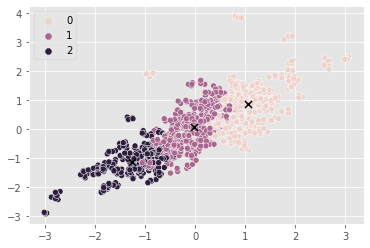

In [6]:
x = data[['AE','LE','AT','LT','AA','LA','NV']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

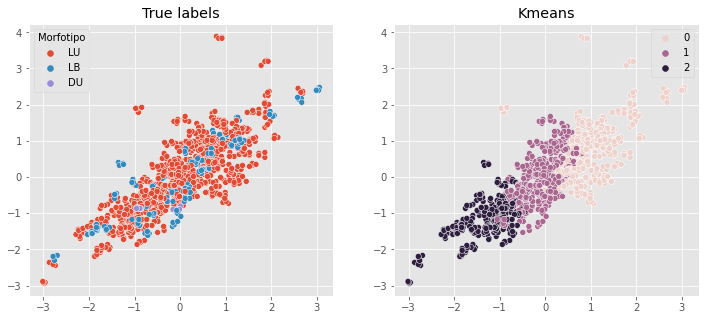

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [8]:
#no puede comparar etiquetas de letras con etiquetas numéricas
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f",yticklabels=['Benigno','Maligno']);

#print(classification_report(y_true,labels))

### Probamos KMEANS con todas las variables de ratios  + NV

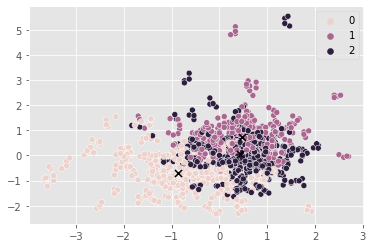

In [8]:
x_R = data[['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
            'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

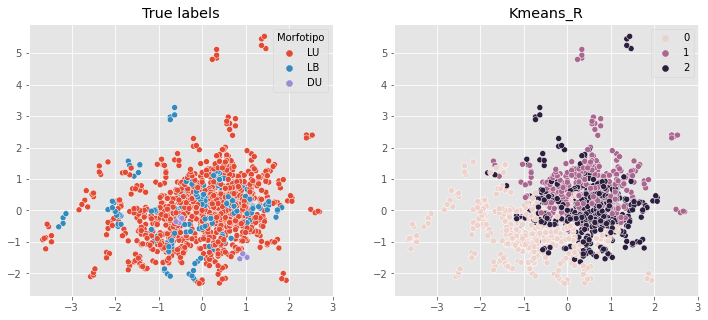

In [9]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

# Prueba PCA

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
std_sclr = StandardScaler()

X = data[['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
            'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]

data_std = pd.DataFrame(std_sclr.fit_transform(X))

In [12]:
model = PCA()

In [13]:
model_pca = model.fit(data_std)

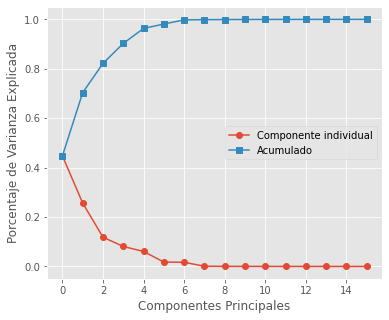

In [14]:
plt.figure(figsize=(6,5))

plt.plot(model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

In [15]:
pca_df = pd.DataFrame(model_pca.components_, index =['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
            'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'], columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
AE,-0.340378,-0.360179,-0.293344,-0.320547,-0.277909,-0.210849,-0.315493,-0.178708,-0.063005,0.209222,-0.234504,-0.196474,0.286368,-0.010214,-0.268590,-0.129848
LE,0.140872,-0.050013,0.285234,0.219499,0.325372,0.344606,0.068329,-0.274369,-0.216915,-0.073466,-0.331004,-0.307500,0.202486,0.194376,-0.313443,-0.331585
AT,-0.179270,0.012819,-0.120337,-0.109571,0.058784,-0.199808,-0.062948,0.264818,0.054916,-0.443037,0.133440,-0.172036,-0.145151,0.572660,0.158533,-0.450444
LT,-0.061571,0.104239,-0.066872,0.153065,0.004428,0.275790,-0.006913,0.272825,0.698989,0.441204,-0.018922,0.006633,0.215640,0.231199,-0.096073,-0.118535
AA,-0.099600,0.193666,0.110387,0.007269,0.006071,0.112720,-0.148978,0.484754,-0.335342,0.196601,0.299671,-0.480740,0.210573,-0.340883,0.125956,-0.148274
LA,-0.195011,-0.128280,-0.011226,0.061478,-0.106496,-0.136594,0.580323,0.077491,0.224659,-0.008690,-0.279659,-0.405859,-0.399147,-0.320298,-0.036325,-0.110111
NV,-0.059850,-0.013285,-0.135050,-0.215184,-0.057244,0.012233,0.729321,0.029705,-0.248776,0.097618,0.212724,0.164950,0.453529,0.212577,-0.026765,0.002876
Ratio_LE_AE,0.262750,0.523991,-0.069421,0.021674,-0.198524,-0.326059,0.023334,-0.456709,0.114058,0.132100,-0.065483,-0.275021,0.186440,0.034570,0.356799,-0.150360
Ratio_LT_AT,-0.213607,-0.446700,0.066586,-0.055932,0.169859,0.315766,0.001524,-0.305058,0.124344,0.036360,0.129702,-0.055389,0.078282,-0.074931,0.687369,-0.068936
Ratio_LA_AA,0.072084,-0.151498,0.143947,-0.120434,0.583264,-0.471171,0.009377,0.041988,-0.045759,0.455947,0.031444,-0.167233,-0.130945,0.240654,0.021209,0.241101


In [16]:
df_pca = pd.DataFrame(model_pca.fit_transform(data_std), index =X.index, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16'])

In [17]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.729739,0.530969,1.240166,-0.346548,0.163734,0.340539,-0.360383,-0.013904,-0.015736,-0.008264,-0.033850,0.018500,-0.022390,0.003323,0.006192,-0.001197
1,-0.641063,0.735454,1.242223,-0.198199,0.294354,0.328882,-0.440497,-0.017758,-0.014206,-0.011521,-0.033336,0.021497,-0.024635,-0.000548,0.008031,-0.001328
2,-0.503176,0.881504,1.356744,-0.203276,0.233941,0.187286,-0.375364,-0.028731,-0.014958,-0.003922,-0.028961,0.024220,-0.026217,0.002256,0.008227,0.000395
3,-0.539336,0.865407,1.021574,-0.490664,0.542807,0.339766,-0.525601,-0.013628,-0.011598,-0.017125,-0.037799,0.020193,-0.021505,-0.004727,0.000829,-0.003036
4,-3.459058,-5.579398,-0.128900,-0.860173,-1.175045,-0.205008,0.624937,0.005555,0.295282,-0.006132,0.173123,-0.011933,0.016864,-0.023459,0.001458,-0.001945


In [19]:
pca_loadings = pd.DataFrame(model_pca.components_.T, index=X.columns).iloc[:,:5]
pca_loadings.rename(columns = {0 : 'CP1', 1 : 'CP2', 2 : 'CP3', 3 : 'CP4', 4 : 'CP5'}, inplace = True)
pca_loadings

,CP1,CP2,CP3,CP4,CP5
AE,-0.340378,0.140872,-0.179270,-0.061571,-0.099600
LE,-0.360179,-0.050013,0.012819,0.104239,0.193666
AT,-0.293344,0.285234,-0.120337,-0.066872,0.110387
LT,-0.320547,0.219499,-0.109571,0.153065,0.007269
AA,-0.277909,0.325372,0.058784,0.004428,0.006071
LA,-0.210849,0.344606,-0.199808,0.275790,0.112720
NV,-0.315493,0.068329,-0.062948,-0.006913,-0.148978
Ratio_LE_AE,-0.178708,-0.274369,0.264818,0.272825,0.484754
Ratio_LT_AT,-0.063005,-0.216915,0.054916,0.698989,-0.335342
Ratio_LA_AA,0.209222,-0.073466,-0.443037,0.441204,0.196601


In [20]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

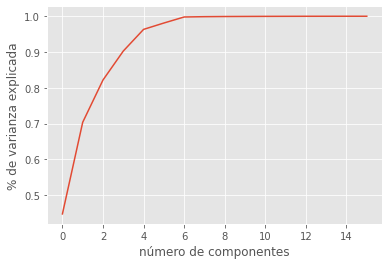

In [21]:
plot_explained_variance(components_count = 16, X = data_std)

## Prueba TSNE

In [22]:
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(data_std)

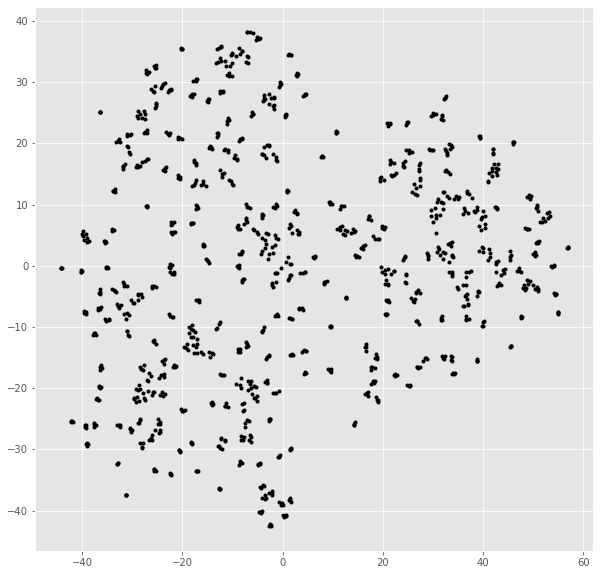

In [24]:
    fig, ax = plt.subplots(figsize=(10, 10))

    # get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
    ax = ax or plt.gca()
    
    coord_x = proj_tsne[:, 0]
    coord_y = proj_tsne[:, 1]
    ax.plot(coord_x, coord_y, '.k')    
    # símbolo . color k (black)